<a href="https://colab.research.google.com/github/ajnCoder/assignment4/blob/main/AndreaNava_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [ ]:
# Q1.1
df = pd.read_csv('./data/cars_hw.csv')
df.drop(df.columns[0], axis = 1, inplace = True)
df.head()

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64


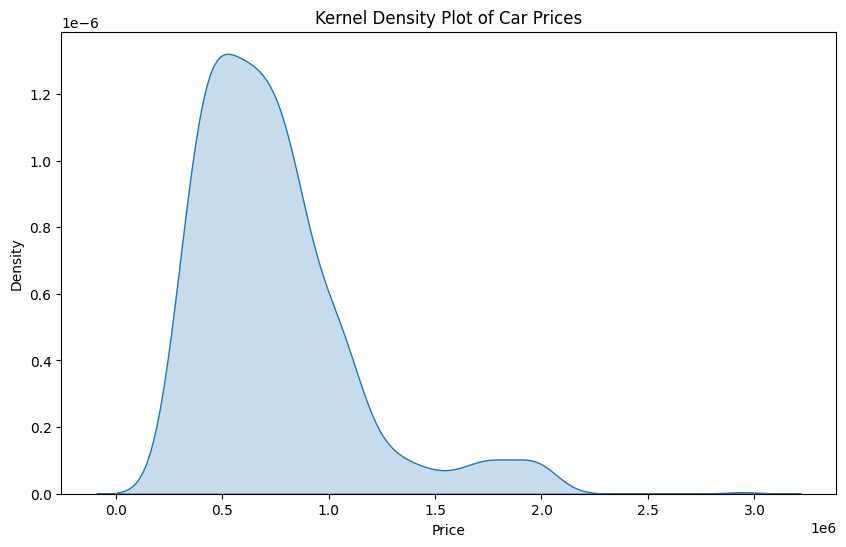

Make
Chevrolet        Axes(0.125,0.11;0.775x0.77)
Datsun           Axes(0.125,0.11;0.775x0.77)
Ford             Axes(0.125,0.11;0.775x0.77)
Honda            Axes(0.125,0.11;0.775x0.77)
Hyundai          Axes(0.125,0.11;0.775x0.77)
Jeep             Axes(0.125,0.11;0.775x0.77)
Kia              Axes(0.125,0.11;0.775x0.77)
MG Motors        Axes(0.125,0.11;0.775x0.77)
Mahindra         Axes(0.125,0.11;0.775x0.77)
Maruti Suzuki    Axes(0.125,0.11;0.775x0.77)
Nissan           Axes(0.125,0.11;0.775x0.77)
Renault          Axes(0.125,0.11;0.775x0.77)
Skoda            Axes(0.125,0.11;0.775x0.77)
Tata             Axes(0.125,0.11;0.775x0.77)
Toyota           Axes(0.125,0.11;0.775x0.77)
Volkswagen       Axes(0.125,0.11;0.775x0.77)
Name: Price, dtype: object

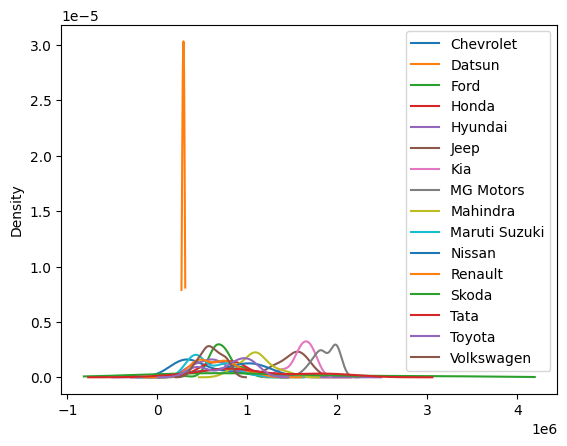

In [ ]:
# Q1.2
price_sum = df['Price'].describe()
print(price_sum)

df.groupby(['Make'])['Price'].describe()

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Price'], fill=True)
plt.title('Kernel Density Plot of Car Prices')
plt.show()


df.groupby(['Make'])['Price'].plot.kde(legend=True)
#

In [ ]:
# Q1.3
training_data, testing_data = train_test_split(df,test_size=.2,random_state=10)

In [ ]:
# Q1.4
numerical_train = training_data.select_dtypes(include='number')
x_train_num = numerical_train.drop('Price', axis=1)
y_train_num = numerical_train['Price']

numerical_test = testing_data.select_dtypes(include='number')
x_test_num = numerical_test.drop('Price', axis=1)
y_test_num = numerical_test['Price']

In [ ]:
model_num = LinearRegression()

model_num.fit(x_train_num, y_train_num)
y_pred = model_num.predict(x_test_num)

mse = mean_squared_error(y_test_num, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test_num, y_pred)

print("RMSE: " + str(rmse))
print("R^2: " + str(r_squared))

RMSE: 268908.2932930864
R^2: 0.3628384799971667


In [ ]:
categorical_train = training_data.select_dtypes(include='object')
cat_train_x = pd.get_dummies(categorical_train)
cols = cat_train_x.columns.tolist()
cat_train_y = training_data['Price']

categorical_test = testing_data.select_dtypes(include='object')
cat_test_x = pd.get_dummies(categorical_test)
cat_test_x = cat_test_x.reindex(columns=cols).fillna(0)
cat_test_y = testing_data['Price']
model = LinearRegression()

model.fit(cat_train_x, cat_train_y)
y_pred = model.predict(cat_test_x)

mse = mean_squared_error(cat_test_y, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(cat_test_y, y_pred)

print("RMSE: " + str(rmse))
print("R^2: " + str(r_squared))

RMSE: 189369.66918313663
R^2: 0.6840182587723642


In [ ]:
train_x = x_train_num.join(cat_train_x)
test_x = x_test_num.join(cat_test_x)
model = LinearRegression()

model.fit(train_x, cat_train_y)
y_pred = model.predict(test_x)

mse = mean_squared_error(cat_test_y, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(cat_test_y, y_pred)

print("RMSE: " + str(rmse))
print("R^2: " + str(r_squared))

RMSE: 138860.13114398727
R^2: 0.8300988614705912


In [ ]:
X_train_cat = x_train_num.select_dtypes(include=['object'])
X_train_num = x_train_num.select_dtypes(include=['number'])
num_attribs = list(X_train_num)
cat_attribs = list(X_train_cat)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

for i in range(10):
  print("Model", i + 1)
  num_pipeline = Pipeline([
      ('poly', PolynomialFeatures(degree=i+1, include_bias=False)),])

  full_pipeline = ColumnTransformer([
          ('num', num_pipeline, num_attribs),
          ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs)
      ])

  X_train_prepared = full_pipeline.fit_transform(x_train_num)
  X_test_prepared = full_pipeline.transform(x_test_num)

  model = LinearRegression()
  model.fit(X_train_prepared, y_train_num)
  y_pred = model.predict(X_test_prepared)

  r2 = r2_score(y_test_num, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test_num, y_pred))

  print("R2:", r2)
  print("RMSE:", rmse)

Model 1
R2: 0.3628384799971667
RMSE: 268908.2932930864
Model 2
R2: 0.39438701815415855
RMSE: 262166.390376813
Model 3
R2: 0.12440445695469549
RMSE: 315232.6534456664
Model 4
R2: 0.3027159639504208
RMSE: 281309.4280275114
Model 5
R2: 0.34538539962443515
RMSE: 272566.3699474694
Model 6
R2: 0.3589735155153525
RMSE: 269722.64697354665
Model 7
R2: 0.37025045103239995
RMSE: 267339.6401103024
Model 8
R2: 0.382514440519506
RMSE: 264723.70309230575
Model 9
R2: 0.12476285118193442
RMSE: 315168.13214508205
Model 10
R2: 0.09127388820212012
RMSE: 321141.12930135796


In [ ]:
# Q1.6
expander = PolynomialFeatures(degree=3,include_bias=False)
Z_train = expander.fit_transform(x_train_num)
names = expander.get_feature_names_out()
X_train_lm = pd.DataFrame(data=Z_train, columns = names)

Z_test = expander.fit_transform(x_test_num)
names = expander.get_feature_names_out()
X_test_lm = pd.DataFrame(data=Z_test, columns = names)

In [ ]:
# Q1.7
depths = []
r2_scores = []
rmse_scores = []
from sklearn.tree import DecisionTreeRegressor

# Used Chatgpt
# Vary the maximum depth of the decision tree
for depth in range(1, 21):  # Adjust the range as needed
    # Fit decision tree regressor
    reg_tree = DecisionTreeRegressor(max_depth=depth)
    reg_tree.fit(X_train, y_train)

    # Predictions on the test set
    y_pred_test = reg_tree.predict(X_test)

    # Calculate R2 score
    r2 = r2_score(y_test, y_pred_test)
    r2_scores.append(r2)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmse_scores.append(rmse)

    depths.append(depth)

    print(f"Depth {depth}: R2 = {r2}, RMSE = {rmse}")

# Find the depth that gives the best results
best_depth_index = np.argmax(r2_scores)  # Use np.argmin for RMSE
best_depth = depths[best_depth_index]
best_r2 = r2_scores[best_depth_index]
best_rmse = rmse_scores[best_depth_index]

print("\nBest Results:")
print(f"Best Depth: {best_depth}")
print(f"Best R2: {best_r2}")
print(f"Best RMSE: {best_rmse}")

Depth 1: R2 = 0.09006810005882337, RMSE = 0.8230312189167357
Depth 2: R2 = 0.13662537818832965, RMSE = 0.8016992976513125
Depth 3: R2 = 0.1739032277262227, RMSE = 0.7842008819247408
Depth 4: R2 = 0.17573322837109207, RMSE = 0.7833318047084655
Depth 5: R2 = 0.22454792353509445, RMSE = 0.7597826033715986
Depth 6: R2 = 0.18056071409391916, RMSE = 0.7810345653184817
Depth 7: R2 = 0.12401379560357118, RMSE = 0.8075334056688359
Depth 8: R2 = 0.1207209669896172, RMSE = 0.8090497394419341
Depth 9: R2 = 0.11332297067723252, RMSE = 0.8124461640760774
Depth 10: R2 = 0.09869201751426715, RMSE = 0.8191217775742962
Depth 11: R2 = 0.0412758973179721, RMSE = 0.8448093010638921
Depth 12: R2 = -0.06096873618473442, RMSE = 0.8887163233020728
Depth 13: R2 = -0.11369788931082381, RMSE = 0.9105327309836895
Depth 14: R2 = -0.10793795874154544, RMSE = 0.9081750879936697
Depth 15: R2 = -0.23544354725065242, RMSE = 0.9590103989551235
Depth 16: R2 = -0.3384171553375652, RMSE = 0.998177120464832
Depth 17: R2 = -0

In [ ]:
tree_model = DecisionTreeRegressor(max_depth=11, random_state=42)
tree_model.fit(X_train_prepared, y_train_num)
y_pred_tree = tree_model.predict(X_test_prepared)

r2 = r2_score(y_test_num, y_pred_tree)
rmse = np.sqrt(mean_squared_error(y_test_num, y_pred_tree))

plt.figure(figsize=(6, 4))
plt.scatter(y_test_num, y_pred_tree, alpha=0.5)
plt.title('True Values vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

residuals = y_test_num - y_pred_tree
plt.figure(figsize=(6, 4))
sns.kdeplot(residuals, fill=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

ValueError: ignored

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

In [ ]:
# Q3.1
df = pd.read_csv('./data/contraception_hw.csv')
df.drop(df.columns[0], axis = 1, inplace = True)
method_counts = df['method'].value_counts()
print(method_counts)
df.head()

1    629
3    511
2    333
Name: method, dtype: int64


,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure,method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [ ]:
cross_tab = pd.crosstab(df['method'], df['numberChildren'])
print(cross_tab)
# The couples that had 0-2 kids, tended to not use contraception
# The couples that had 3-5 kids, tended to use short term contraception
# The couples that had more than 6 kids, tended to not use contraception as well

numberChildren  0    1    2    3   4   5   6   7   8   9   10  11  12  13  16
method                                                                       
1               95  143  114   70  57  44  35  18  29   5   9   6   4   0   0
2                0   46   56   70  62  36  27  19   9   3   2   2   0   1   0
3                2   87  106  119  78  55  30  12   9   8   0   3   0   1   1


In [ ]:
# Q3.2
X = df.drop('method', axis=1)
y = df['method']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

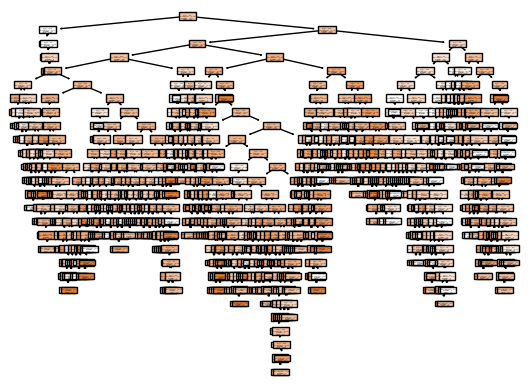

In [ ]:
# Q3.3
model = tree.DecisionTreeRegressor()
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

# This regression tree takes on numerical values, but the dependent variable is categorical.
# Regression trees are not suitable for representing categories. In addition, after each run, it kept getting bigger and bigger.

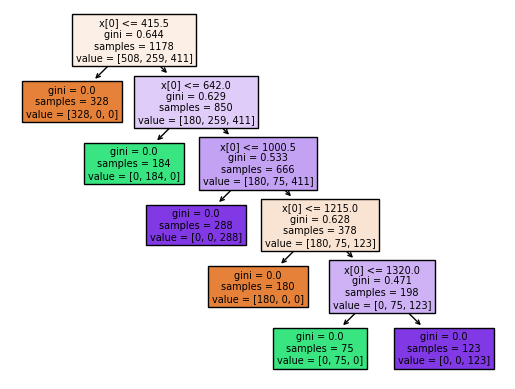

In [ ]:
# Q3.4
model = tree.DecisionTreeClassifier()
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
y_hat_cart = cart.predict(X_test)

# This tree is much more organized. It correctly represents the classes 1, 2, 3.

In [ ]:
# Q3.5
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

for i in range(1, 4):
    acc_method_i = conf_matrix[i-1, i-1] / conf_matrix[i-1, :].sum()
    print(f"Accuracy for Method {i}: {acc_method_i}")

Confusion Matrix:
 [[121   0   0]
 [  1  73   0]
 [  0   0 100]]
Overall Accuracy: 0.9966101694915255
Accuracy for Method 1: 1.0
Accuracy for Method 2: 0.9864864864864865
Accuracy for Method 3: 1.0


**Q3.6**

A linear probability model might not be suitable for this because the dependent variable, contraceptive method, is categorical with three classes. Linear probability models are commonly used for two classes but can lead to issues with interpretation and prediction accuracy when applied to more than two classes.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

In [ ]:
# Q4.1
df = pd.read_csv('./data/pretrial_data.csv')
df_cleaned = df.dropna()
df_cleaned.head()

,Unnamed: 0,case_type,age,sex,race,is_poor,bond,bond_type,prior_F,prior_M,gini,released,sentence_type,sentence,bond_NA,held_wo_bail,sentence_NA
116,116,F,30.0,M,B,0.0,2000.0,2,1.0,9.0,0.43,1.0,1.0,0.985626,False,False,False
118,118,F,31.0,F,W,0.0,1000.0,2,2.0,4.0,0.41,1.0,0.0,54.000000,False,False,False
119,119,M,43.0,M,B,1.0,4000.0,3,4.0,17.0,0.42,1.0,1.0,12.000000,False,False,False
120,120,F,36.0,F,B,1.0,3000.0,3,0.0,1.0,0.39,1.0,4.0,0.000000,False,False,True
122,122,F,29.0,M,B,0.0,2000.0,2,0.0,0.0,0.46,1.0,4.0,0.000000,False,False,True


In [ ]:
# Q4.2
df['Black'] = (df['race'] == 'Black').astype(int)

In [ ]:
X = df[['Black', 'sex', 'is_poor', 'prior_F', 'case_type', 'age']]
y = df['held_wo_bail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

coefficients = dict(zip(X.columns, linear_model.coef_))
print('Coefficients:', coefficients)

# Decided to do Q3 instead

ValueError: ignored